<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BPv1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py # HDF5를 이용하면 대량의 NumPy 데이터 등을 손쉽게 관리할 수 있다.

from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

import numpy as np
import tensorflow as tf
import random

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/data/train_feature.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/data/test_after_feature.mat')

X_train = train_data['data']
X_test = test_data['data']

sbp_train = train_data['sbp_total'] # 수축기
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total'] # 이완기
dbp_test = test_data['dbp_total'] 


In [4]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)
# 0: area
# 1: st
# 2: dt
# 3: 
# 4:
# 5:
# 6:
# 7:
# 8:
# 9: bpm
# 10: 나이
# 11: 키
# 12: 몸무게
# 13: 성별

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,337.416745,0.176250,0.638750,0.523750,0.323750,0.151250,0.642500,0.417500,0.217500,76.212471,53.0082,148.65,48.65,0.0
1,257.321639,0.183750,0.457500,0.353125,0.198125,0.123125,0.473750,0.293125,0.193750,96.551724,53.0082,148.65,48.65,0.0
2,249.801359,0.168750,0.433750,0.337500,0.203125,0.125000,0.451875,0.292500,0.191250,102.689487,53.0082,148.65,48.65,0.0
3,250.852644,0.171250,0.447500,0.348125,0.196250,0.121250,0.463125,0.286875,0.187500,99.762470,53.0082,148.65,48.65,0.0
4,249.526044,0.168750,0.470000,0.363750,0.191250,0.115000,0.477500,0.282500,0.181250,96.774194,53.0082,148.65,48.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,291.119448,0.186250,0.673125,0.504375,0.188750,0.096875,0.628750,0.283125,0.163750,71.090047,53.0082,148.65,48.65,0.0
99,301.255091,0.186875,0.680000,0.500625,0.193125,0.104375,0.625625,0.289375,0.173125,70.754717,53.0082,148.65,48.65,0.0
100,332.521091,0.242500,0.696250,0.503750,0.216250,0.130000,0.663750,0.341250,0.215000,64.903846,46.5288,157.00,59.00,0.0
101,346.043612,0.263750,0.722500,0.526875,0.225000,0.135000,0.686250,0.347500,0.218125,61.538462,46.5288,157.00,59.00,0.0


# 새 섹션

In [5]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,244.551045,0.158750,0.541875,0.432500,0.171875,0.072500,0.535625,0.248750,0.127500,87.804878,18.1014,160.2,46.3,0.0
1,251.247886,0.166250,0.555000,0.431250,0.175000,0.075000,0.540000,0.256250,0.133750,84.832905,18.1014,160.2,46.3,0.0
2,231.710267,0.193750,0.532500,0.401250,0.146250,0.071250,0.518125,0.239375,0.132500,84.705882,18.1014,160.2,46.3,0.0
3,221.664035,0.195625,0.533750,0.230000,0.138750,0.070000,0.353125,0.228125,0.132500,84.905660,18.1014,160.2,46.3,0.0
4,227.446045,0.199375,0.531875,0.391875,0.150625,0.072500,0.508125,0.240625,0.135000,84.309133,18.1014,160.2,46.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61892,290.873860,0.195000,0.563750,0.432500,0.255000,0.111250,0.555000,0.352500,0.181250,81.280788,70.0000,149.1,49.8,0.0
61893,305.386505,0.201875,0.598750,0.438125,0.281875,0.114375,0.572500,0.385000,0.186250,76.530612,70.0000,149.1,49.8,0.0
61894,302.774386,0.221250,0.593750,0.433750,0.285625,0.116875,0.570625,0.390000,0.188125,76.142132,70.0000,149.1,49.8,0.0
61895,314.019674,0.205000,0.613750,0.437500,0.302500,0.120000,0.577500,0.402500,0.195000,75.000000,70.0000,149.1,49.8,0.0


In [6]:
df_sbp_train_raw = pd.DataFrame(sbp_train)
df_sbp_train_raw

,0
0,135.775211
1,179.325361
2,179.186643
3,170.764167
4,157.368326
...,...
241246,97.332018
241247,98.070315
241248,97.253163
241249,97.532775


In [7]:
df_sbp_test_raw = pd.DataFrame(sbp_test)
df_sbp_test_raw

,0
0,129.317261
1,122.939795
2,119.407786
3,115.714596
4,117.881726
...,...
61892,122.096567
61893,122.236613
61894,122.285327
61895,121.677324


In [8]:
df_dbp_train_raw = pd.DataFrame(dbp_train)
df_dbp_train_raw

,0
0,72.061022
1,94.966878
2,102.733207
3,95.009137
4,87.878310
...,...
241246,60.409130
241247,61.291688
241248,61.004405
241249,61.052105


In [9]:
df_dbp_test_raw = pd.DataFrame(dbp_test)
df_dbp_test_raw

,0
0,70.706313
1,68.775737
2,67.477237
3,66.076806
4,67.177870
...,...
61892,63.092004
61893,62.690702
61894,62.474015
61895,61.534257


In [10]:
print(X_train.shape)
print(X_test.shape)

(241251, 14)
(61897, 14)


In [11]:
epoch = 50
learning_rate = 0.001
batch_size = 512
drop_rate = 0.3
validation_rate = 0.05

# model 생성

In [12]:
model = Sequential()

In [13]:
model.add(Dense(8, activation='relu', input_dim=14))
model.add(Dense(8, activation='relu'))
model.add(Dropout(drop_rate))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(drop_rate))
model.add(BatchNormalization())
# model.add(Dropout(drop_rate))

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(drop_rate))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(drop_rate))
model.add(BatchNormalization())

# model.add(Dropout(drop_rate)))

# sigmoid를 하면 안됨 
model.add(Dense(1))




In [14]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history = model.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data = (X_test, sbp_test) )

Epoch 1/50
472/472 [==============================] - 4s 5ms/step - loss: 12380.4375 - val_loss: 11592.2295
Epoch 2/50
472/472 [==============================] - 2s 5ms/step - loss: 10354.2666 - val_loss: 8951.4102
Epoch 3/50
472/472 [==============================] - 2s 5ms/step - loss: 7377.4321 - val_loss: 5813.9375
Epoch 4/50
472/472 [==============================] - 2s 5ms/step - loss: 4428.0103 - val_loss: 3167.7766
Epoch 5/50
472/472 [==============================] - 2s 5ms/step - loss: 2206.4797 - val_loss: 1426.7596
Epoch 6/50
472/472 [==============================] - 2s 5ms/step - loss: 947.2001 - val_loss: 614.7933
Epoch 7/50
472/472 [==============================] - 2s 5ms/step - loss: 438.2635 - val_loss: 358.2001
Epoch 8/50
472/472 [==============================] - 2s 5ms/step - loss: 309.8763 - val_loss: 316.1298
Epoch 9/50
472/472 [==============================] - 2s 5ms/step - loss: 292.3528 - val_loss: 308.0824
Epoch 10/50
472/472 [==============================

In [16]:
pred = model.predict(X_test)

err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋다 , std 오차들의 표준편차 작으면 좋다
# 앙상블 개념 익히기
# total_me = total_me + me
# total_std = total_std + std

# me: 5, std: 8

# 현재 값
# ME:  4.358033621812683 
# MAE:  13.448203723265562 
# SD:  17.145971501757842

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  4.358033621812683 
MAE:  13.448203723265562 
SD:  17.145971501757842


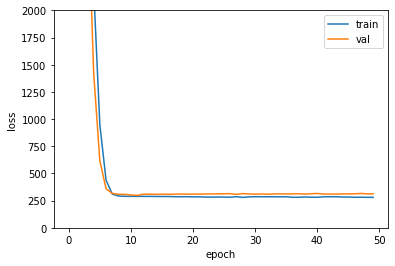

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 2000])  
plt.legend(['train','val'])
plt.show()